# Lab 3 - ANNDA

In [1]:
import hopfield
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Hopfield Networks

## 3.1 Convergence and Attractors

### Patterns

In [2]:
# Memory Patterns
x1 = np.array([[-1,-1,1,-1,1,-1,-1,1]])
x2 = np.array([[-1,-1,-1,-1,-1,1,-1,-1]])
x3 = np.array([[-1,1,1,-1,-1,1,-1,1]])
X = np.append(x1,np.append(x2,x3,axis=0), axis = 0)


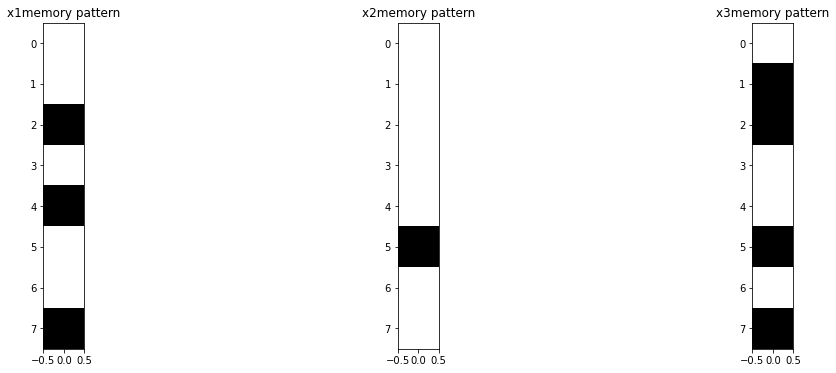

In [3]:
# Display Patterns as some binary image representation
hopfield.show_patterns(X.T, name='memory pattern')

In [4]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(dimension=np.shape(X)[1])

### Training Weight Matrix of Hopfield

### Distorted Patterns

In [5]:
# Distorted Patterns
x1d = np.array([[1,-1,1,-1,1,-1,-1,1]]) # one bit error
x2d = np.array([[1,1,-1,-1,-1,1,-1,-1]]) # two bit errors
x3d = np.array([[1,1,1,-1,1,1,-1,1]]) # two bit errors
Xd = np.append(x1d,np.append(x2d,x3d,axis=0),axis=0)

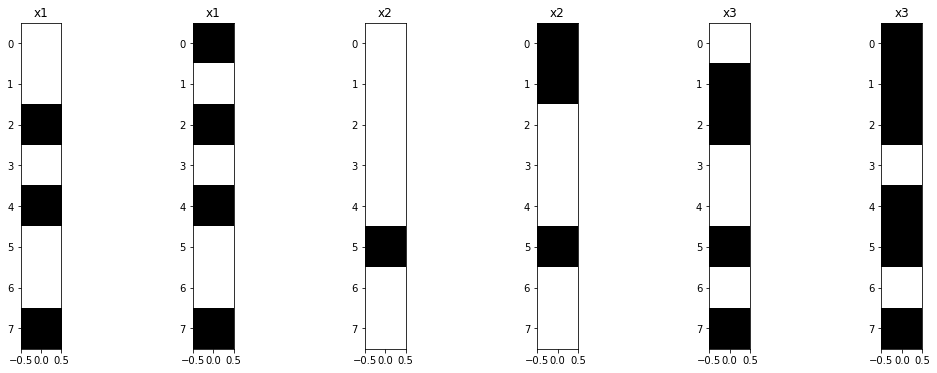

In [6]:
# Compare Patterns
hopfield.compare_patterns(X.T,Xd.T)

### Computing Weights

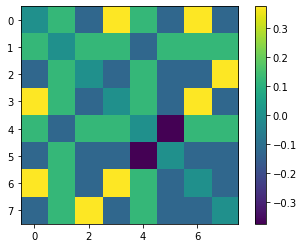

In [7]:
# Train/Compute Weight Matrix
hopnet.train(X)

# Plot Weight Matrix
hopnet.plot_weights()

### Apply Update Rule to Distorted Patterns

In [8]:
# Asynchronous (sequential) recall/update
steps = 20

# Shape of recovered distorted patterns
Xd_rec = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
n_patterns

for i in range(n_patterns):
    xs,energies,count = hopnet.asynchronous_recall(Xd[[i],:], steps)
    Xd_rec[[i],:] = xs[-1]
    print(count)

2
2
2


### Compare Updated Distorded Patterns to Original

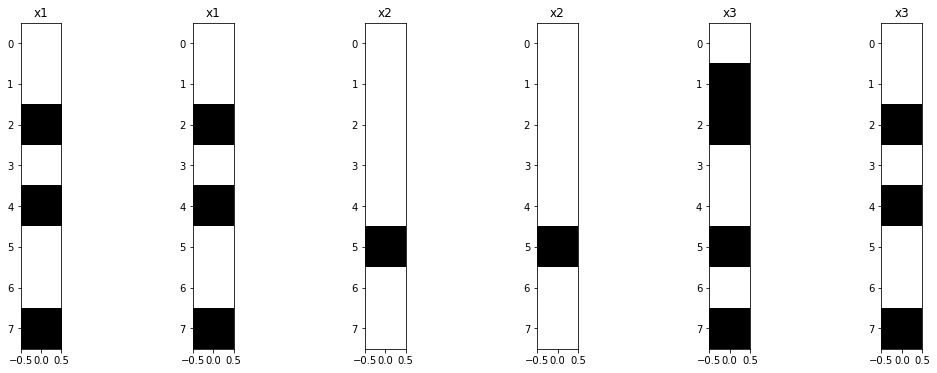

In [9]:
# Plot Original Patterns vs Updated Distorted
hopfield.compare_patterns(X.T, Xd_rec.T)

### How Many Attractors are in the Network?

In [10]:
# Iterate over all possible patterns (for dimension of interest)
n_steps = 20
attractors, energies = hopnet.find_attractors(n_steps)

256


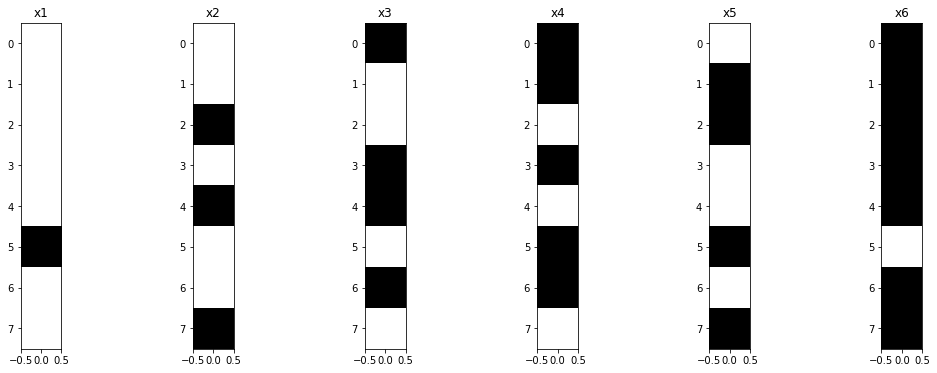

In [11]:
# Plot Attractors
hopfield.show_patterns(attractors.T)

### Extreme Distortion

In [12]:
X

array([[-1, -1,  1, -1,  1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1]])

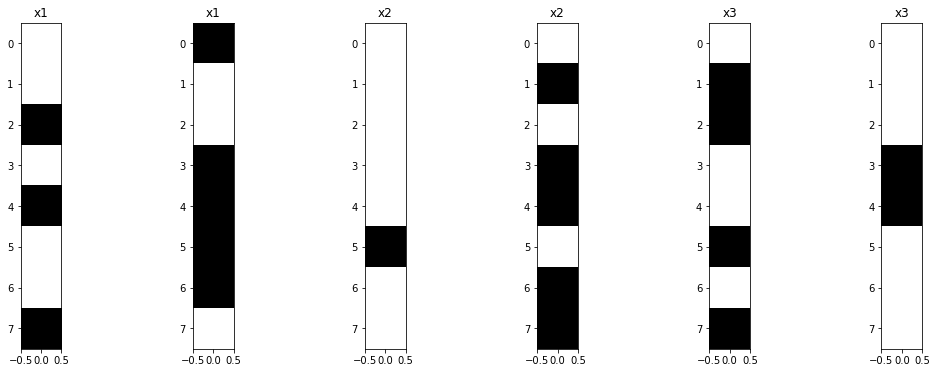

In [13]:
Xd_big = hopfield.distort_patterns(X, 6)
X

# Plot comparrison of distort and original
hopfield.compare_patterns(X.T, Xd_big.T)

In [14]:
# Asynchronous (sequential) recall/update
steps = 20

# Shape of recovered distorted patterns
Xd_rec_big = np.zeros(np.shape(Xd))
n_patterns = np.shape(Xd)[0]
n_patterns

for i in range(n_patterns):
    xs,energies,count = hopnet.asynchronous_recall(Xd[[i],:], steps)
    Xd_rec_big[[i],:] = xs[-1]
    print(count)

2
2
2


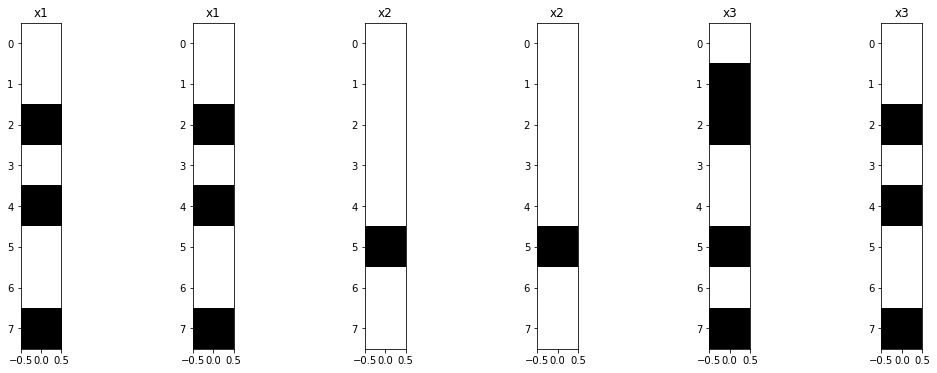

In [15]:
# Plot Stored Patterns and "recovered" Distorted Patterns
hopfield.compare_patterns(X.T, Xd_rec.T)

## 3.2 Sequential Update

In [16]:
# Load in Data
pictures = np.genfromtxt('pict.dat', delimiter=',')
picture_patterns = np.reshape(pictures, (11,1024))


In [17]:
# Show first 3 Image Patterns
# pictures_32_32 = []
# for i in range(np.shape(picture_patterns)[0]):
#     p_row = picture_patterns[i]
#     p = np.reshape(p_row,(32,32))
#     pictures_32_32.append(list(p))


In [18]:
# Get first 3 pictures
pictures_1_3 = picture_patterns[:3,:]
X = pictures_1_3
np.shape(pictures_1_3)

(3, 1024)

In [19]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(dimension=np.shape(X)[1])

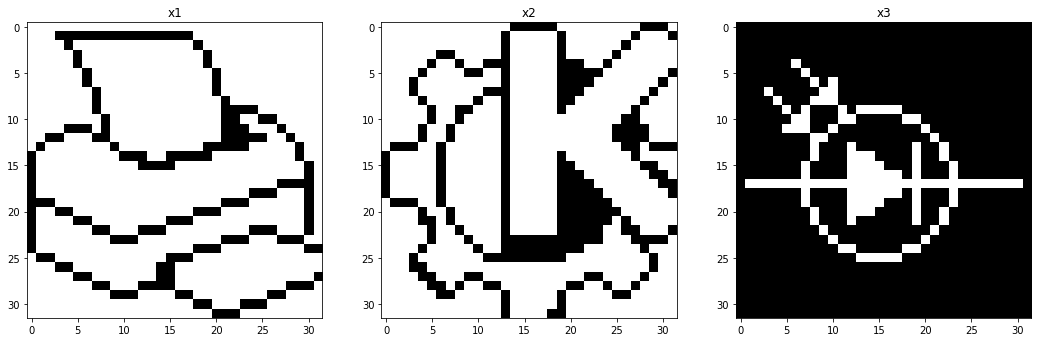

In [20]:
# Plot First 3 Images
hopfield.show_img_pattern(pictures_1_3)

### Check 3 Patterns are Stable

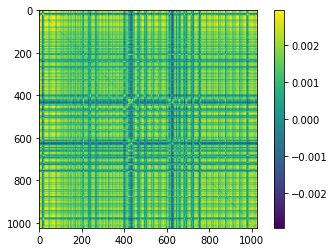

In [21]:
# Compute Weights
# Train/Compute Weight Matrix
hopnet.train(X)

# Plot Weight Matrix
hopnet.plot_weights()

In [22]:
# Apply Asynchronous recall to images
# Asynchronous (sequential) recall/update
steps = 100

# Shape of recovered distorted patterns
X_rec = np.zeros(np.shape(X))
n_patterns = np.shape(X)[0]
n_patterns

for i in range(n_patterns):
    xs,energies,count = hopnet.asynchronous_recall(X[[i],:], steps)
    X_rec[[i],:] = xs[-1]
    print(count)

1
1
1


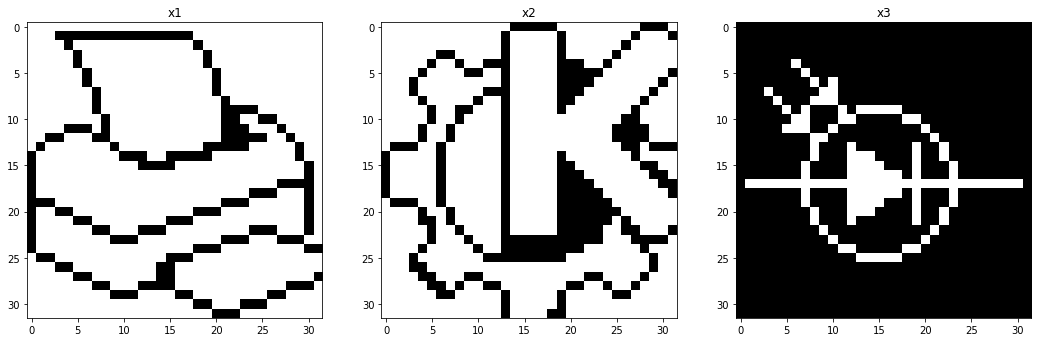

In [23]:
# Plot 3 Picture Patterns after updates
hopfield.show_img_pattern(X_rec)
# They are the same

### Can Network Handle a Degraded Pattern?

In [24]:
# Get Pictures 10 and 11
pictures_10_11 = picture_patterns[9:11,:]
X_degraded = pictures_10_11

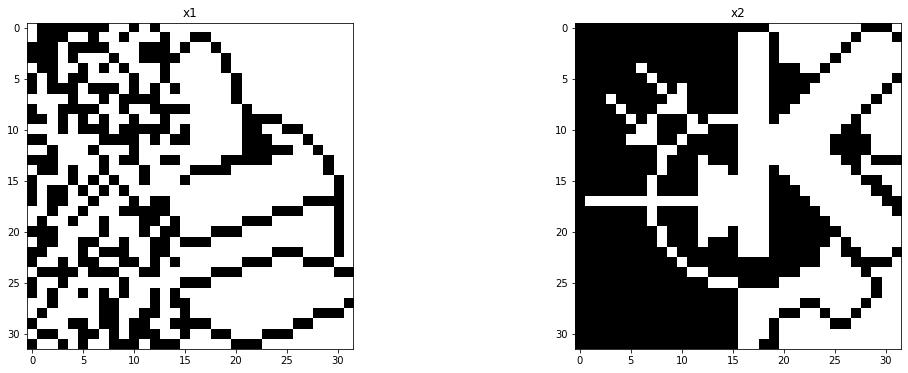

In [25]:
# Plot Degraded IMages/Patterns
hopfield.show_img_pattern(X_degraded)

In [26]:
# Update Degraded Patterns
steps = 100

# Shape of recovered distorted patterns
X_degraded_rec = np.zeros(np.shape(X_degraded))
n_patterns = np.shape(X_degraded)[0]
n_patterns

for i in range(n_patterns):
    xs,energies,count = hopnet.asynchronous_recall(X_degraded[[i],:], steps)
    X_degraded_rec[[i],:] = xs[-1]
    print(count)

2
3


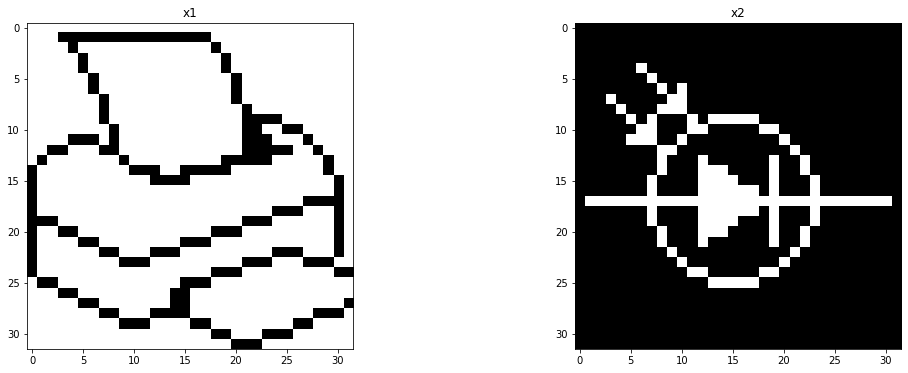

In [27]:
# Plot Recovered Degraded Patterns
hopfield.show_img_pattern(X_degraded_rec)

##### Some Notes:
###### It converges almost instantaneously. It works for the first case but not for the second

### What happens if we select units randomly?

In [28]:
# Create 3 Random Patterns
dim = 1024
n_patterns = 3
X_rand = hopfield.random_patterns(n_patterns,dim)

#### Plot Random Patterns

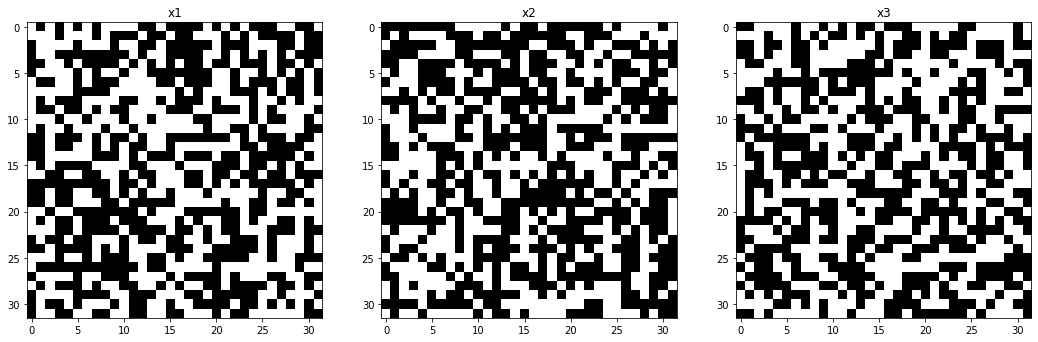

In [29]:
# Plot the Random Patterns
hopfield.show_img_pattern(X_rand)

#### Update Random Patterns

In [30]:
# Update Degraded Patterns
steps = 100

# Shape of recovered distorted patterns
X_rand_rec = np.zeros(np.shape(X_rand))
n_patterns = np.shape(X_rand)[0]
n_patterns

for i in range(n_patterns):
    xs,energies,count = hopnet.asynchronous_recall(X_rand[[i],:], steps)
    X_rand_rec[[i],:] = xs[-1]
    print(count)

2
2
2


#### Plot Recovered Distorted Patterns

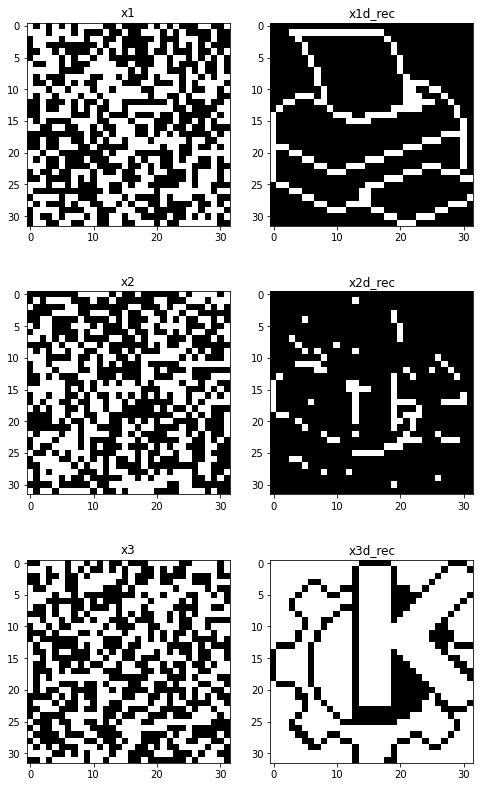

In [31]:
# Plot recovered distorted patterns vs distorted patterns
hopfield.compare_img_patterns(X_rand_rec, X_rand, recovered=True)

## 3.3 Energy

In [32]:
# Picture Data
# Load in Data
pictures = np.genfromtxt('pict.dat', delimiter=',')
picture_patterns = np.reshape(pictures, (11,1024))

# Get first 3 pictures
pictures_1_3 = picture_patterns[:3,:]
X = pictures_1_3

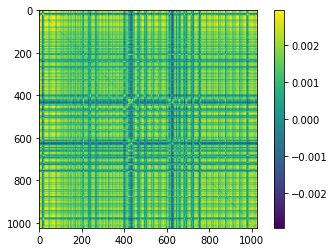

In [33]:
# Create Hopfield Network
hopnet = hopfield.Hopfield(np.shape(X)[1])

# Compute Weight Matrix
hopnet.train(X)
hopnet.plot_weights()

#### Can't Find Energy At all Attractors - it tooooo big

In [34]:
# Find (some) Attractors and their energies
n_steps = 20
attractors, attractor_energies = hopnet.find_attractors(n_steps, n_attr=10)
attractors

10


array([[-1, -1, -1, ..., -1, -1, -1]])

#### Energy at Distorted Patterns


In [35]:
# Load Distorted Patterns
# Get Pictures 10 and 11
pictures_10_11 = picture_patterns[9:11,:]
X_degraded = pictures_10_11

In [36]:
# Asynchronous (sequential) recall/update
steps = 100

# Shape of recovered distorted patterns
Xd_rec = np.zeros(np.shape(X_degraded))
n_patterns = np.shape(X_degraded)[0]
n_patterns
energies_at_distorted_patterns = []

for i in range(n_patterns):
    xs,energies,count = hopnet.asynchronous_recall(X_degraded[[i],:], steps)
    energies_at_distorted_patterns.append(energies[0])
    Xd_rec[[i],:] = xs[-1]

energies_at_distorted_patterns

[-206.490234375, -85.25]

#### Energy Change of Distorted Patterns over Iterations - Sequential Update

In [37]:
# Asynchronous (sequential) recall/update
steps = 100

# Shape of recovered distorted patterns
Xd_rec = np.zeros(np.shape(X_degraded))
n_patterns = np.shape(X_degraded)[0]
n_patterns
energy_change_of_patterns = []

for i in range(n_patterns):
    xs,energies,count = hopnet.synchronous_recall(X_degraded[[i],:], steps)
    energy_change_of_patterns.append(energies)
    Xd_rec[[i],:] = xs[-1]

energy_change_of_patterns

[[-206.490234375, -718.1953125], [-85.25, -587.505859375, -796.505859375]]

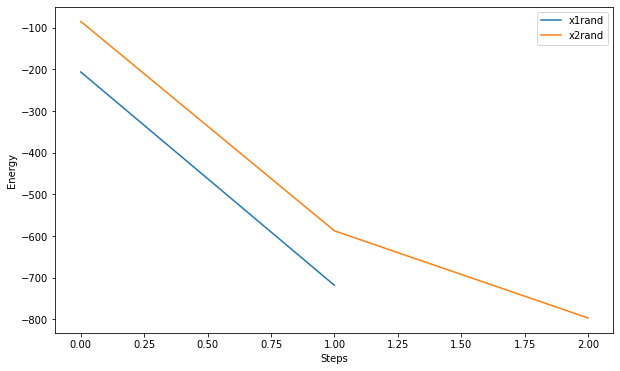

In [38]:
energy_change_of_patterns = list(energy_change_of_patterns)
hopfield.plot_energies(energy_change_of_patterns,name='rand')

#### Random Weights and Iterating Arbitrary Starting State

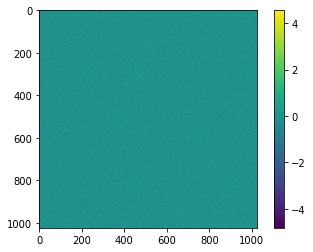

In [39]:
# Create New Net
hopnet_random = hopfield.Hopfield(dimension=np.shape(X)[1])

# Generate Random Weights
hopnet_random.random_weight()

# Plot Weights
hopnet_random.plot_weights()

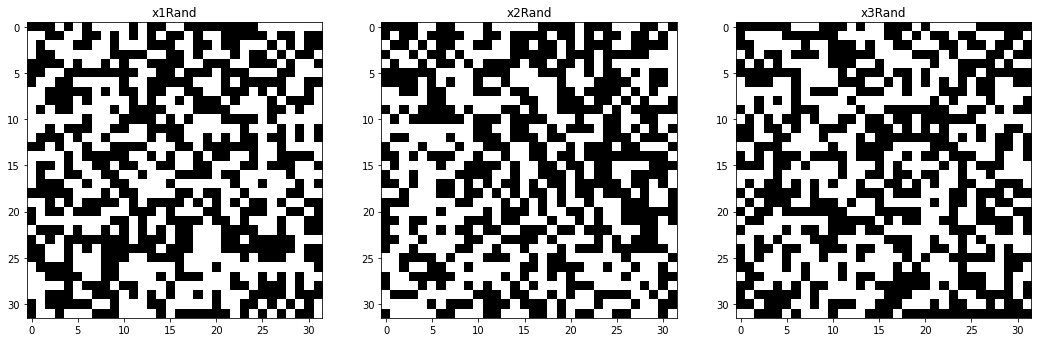

In [40]:
# Generate Random/Arbitrary Patterns
dimension = 1024
n_patterns = 3
Xrand = hopfield.random_patterns(n_patterns,dimension)

# Plot Arbitrary Patterns
hopfield.show_img_pattern(Xrand,name='Rand')

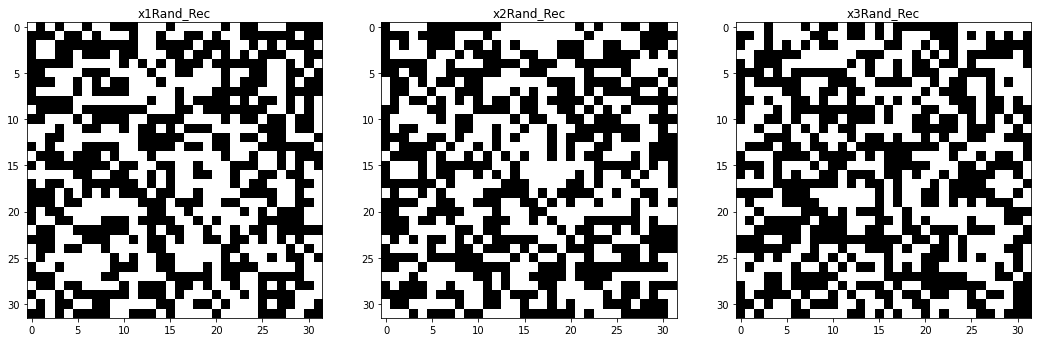

In [41]:
# Apply Asynchronous Update
steps = 100

# Shape of recovered distorted patterns
Xrand_rec = np.zeros(np.shape(Xrand))
n_patterns = np.shape(Xrand)[0]
n_patterns
energy_change_of_patterns = []

for i in range(n_patterns):
    xs,energies,count = hopnet_random.asynchronous_recall(Xrand[[i],:], steps)
    energy_change_of_patterns.append(energies)
    Xrand_rec[[i],:] = xs[-1]

# Plot Updated Arbitrary Patterns
hopfield.show_img_pattern(Xrand_rec, name='Rand_Rec')

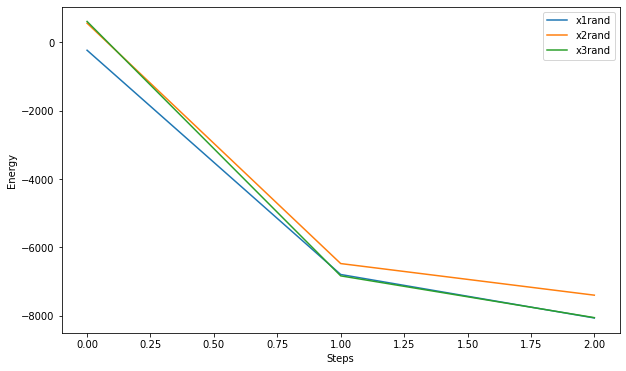

In [42]:
# Plot energies over time
energy_change_of_patterns = list(energy_change_of_patterns)
hopfield.plot_energies(energy_change_of_patterns,name='rand')

#### Make Weight Matrix Symmetric

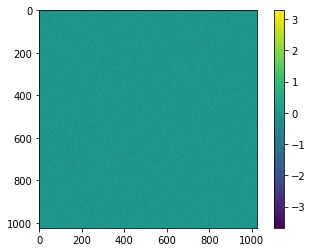

In [43]:
# Hopfield Net
hopnet_random_sym = hopfield.Hopfield(dimension=np.shape(X_rand)[1])

# Generate Symmetric Weights
hopnet_random_sym.random_weight(symmetric=True)

# Plot Weights
hopnet_random_sym.plot_weights()

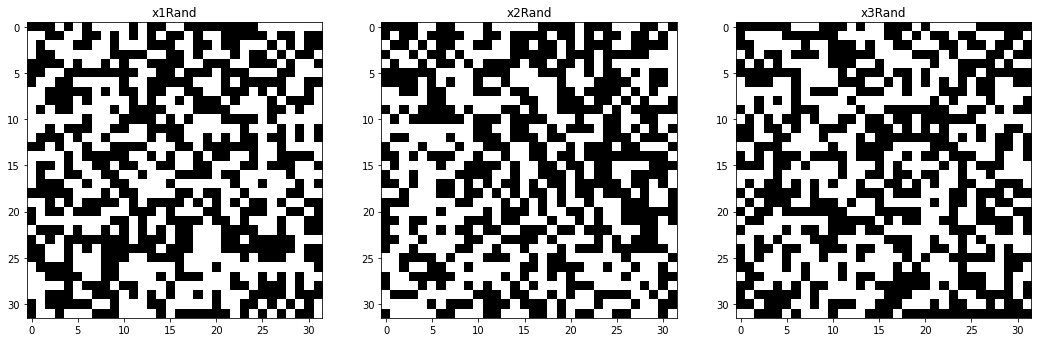

In [44]:
# Plot Arbitrary Patterns
hopfield.show_img_pattern(Xrand,name='Rand')

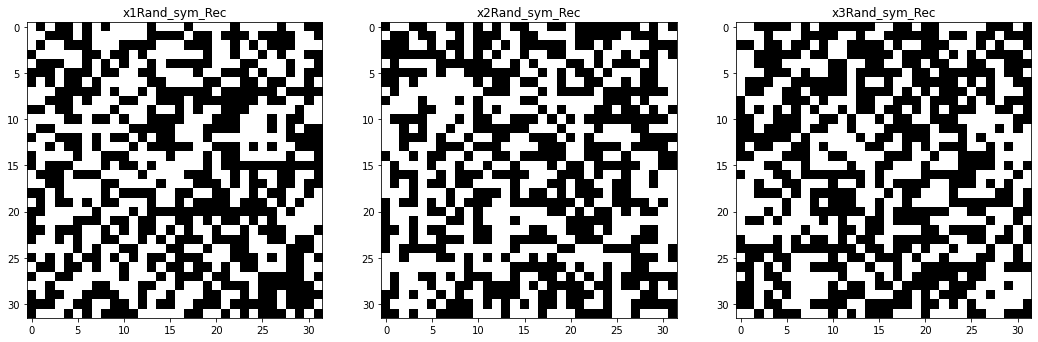

In [45]:
# Apply Asynchronous Update
steps = 100

# Shape of recovered distorted patterns
Xrand_rec_sym = np.zeros(np.shape(Xrand))
n_patterns = np.shape(Xrand)[0]
n_patterns
energy_change_of_patterns = []

for i in range(n_patterns):
    xs,energies,count = hopnet_random_sym.asynchronous_recall(Xrand[[i],:], steps)
    energy_change_of_patterns.append(energies)
    Xrand_rec_sym[[i],:] = xs[-1]

# Plot Updated Arbitrary Patterns
hopfield.show_img_pattern(Xrand_rec_sym, name='Rand_sym_Rec')

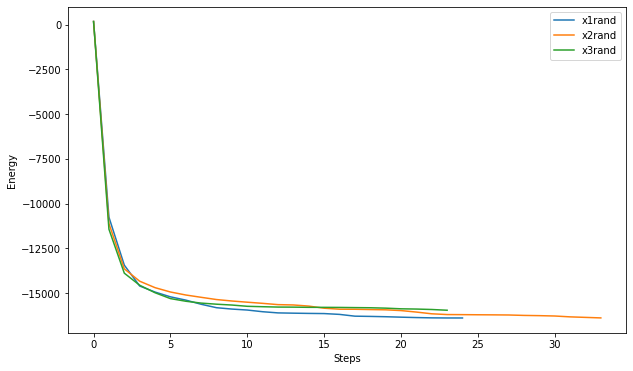

In [46]:
# Plot energies over time
energy_change_of_patterns = list(energy_change_of_patterns)
hopfield.plot_energies(energy_change_of_patterns,name='rand')

## 3.4 Distortion Resistance

#### Loading Data, Training, Defining Network...

In [47]:
# Load in Data
pictures = np.genfromtxt('pict.dat', delimiter=',')
picture_patterns = np.reshape(pictures, (11,1024))

# Get first 3 pictures
pictures_1_3 = picture_patterns[:3,:]
X = pictures_1_3
np.shape(pictures_1_3)

(3, 1024)

In [48]:
# Create Hopfield Network
hopnet_noise = hopfield.Hopfield(dimension=np.shape(X)[1])

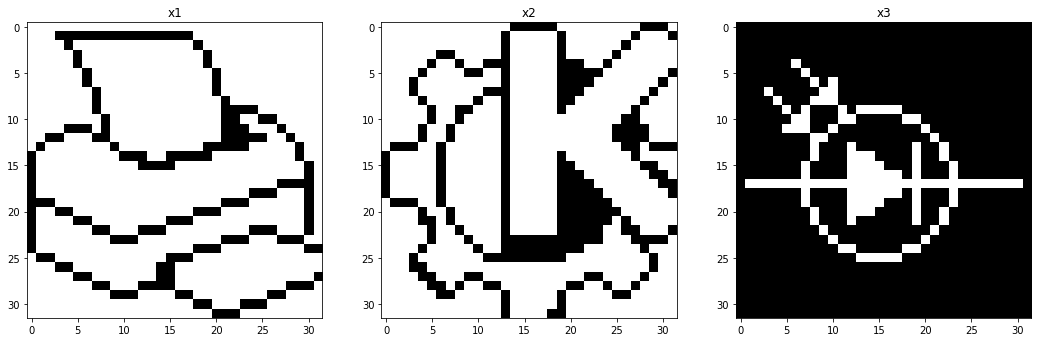

In [49]:
# Plot First 3 Images
hopfield.show_img_pattern(pictures_1_3)

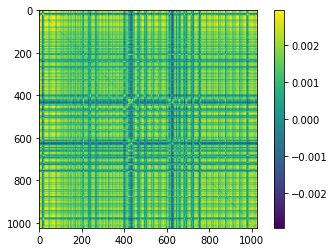

In [50]:
# Compute Weights using 3 pictures
hopnet_noise.train(X)

hopnet_noise.plot_weights()

In [51]:
# Generate Noisy Patterns
x_1 = X[0]    # Picture 1
x_2 = X[1]    # Picture 2
x_3 = X[2]    # Picture 3

In [52]:
noisy_picture1 = hopfield.generate_noisy_image(x_1)
noisy_picture2 = hopfield.generate_noisy_image(x_2)
noisy_picture3 = hopfield.generate_noisy_image(x_3)

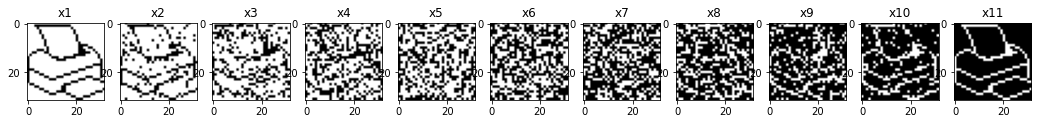

In [53]:
hopfield.show_img_pattern(noisy_picture1)

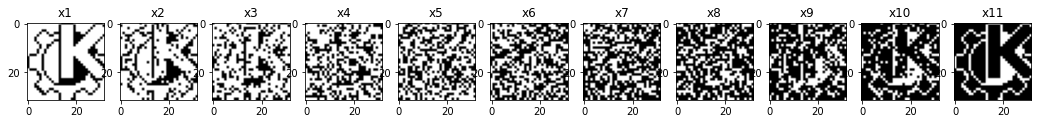

In [54]:
hopfield.show_img_pattern(noisy_picture2)

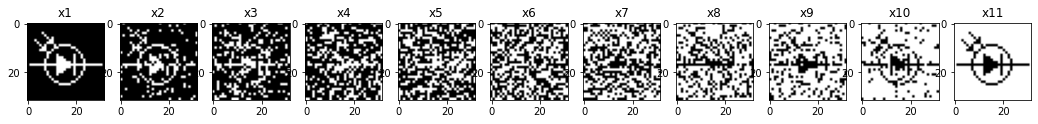

In [55]:
hopfield.show_img_pattern(noisy_picture3)

#### Image 1 With Noise

In [56]:
# Image 1
X1 = noisy_picture1

# Train with Little Model
# Asynchronous (sequential) recall/update
steps = 100

# Shape of recovered distorted patterns
X1_rec = np.zeros(np.shape(X1))
n_patterns = np.shape(X1)[0]
n_patterns
energy_change_of_patterns = []

for i in range(n_patterns):
    xs,energies,count = hopnet.synchronous_recall(X1[[i],:], steps)
    energy_change_of_patterns.append(energies)
    X1_rec[[i],:] = xs[-1]

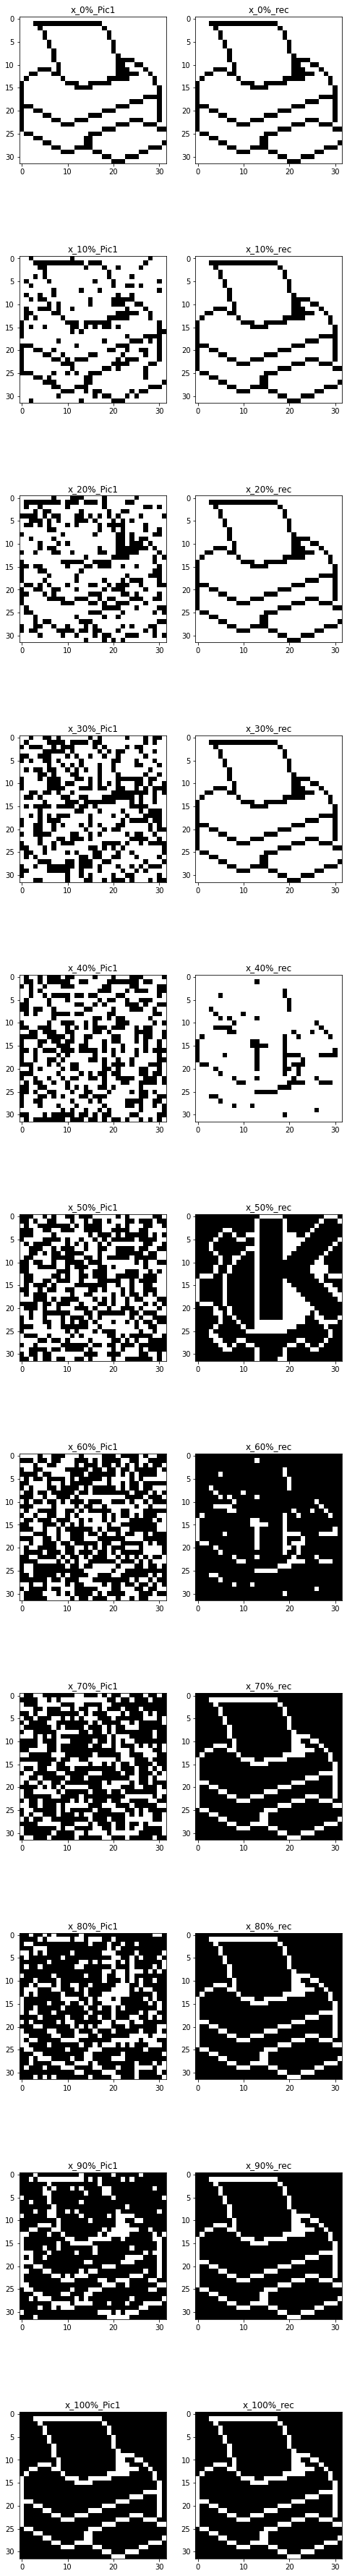

In [57]:
hopfield.compare_noisy_img_patterns(X1_rec, X1, recovered=True, name='Pic1')

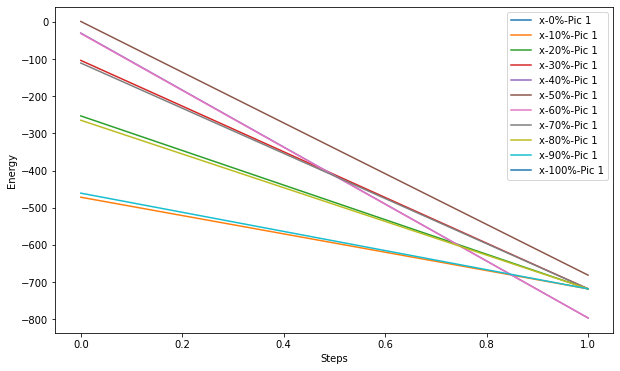

In [58]:
# Plot Energy Change Over Time
hopfield.plot_energies_noisy_img(energy_change_of_patterns,name='Pic 1')

#### Image 2 with Noise

In [64]:
# Image 2
X2 = noisy_picture2

# Train with Little Model
# Asynchronous (sequential) recall/update
steps = 100

# Shape of recovered distorted patterns
X2_rec = np.zeros(np.shape(X2))
n_patterns = np.shape(X2)[0]
n_patterns
energy_change_of_patterns_2 = []

for i in range(n_patterns):
    xs,energies,count = hopnet.synchronous_recall(X2[[i],:], steps)
    energy_change_of_patterns_2.append(energies)
    X2_rec[[i],:] = xs[-1]

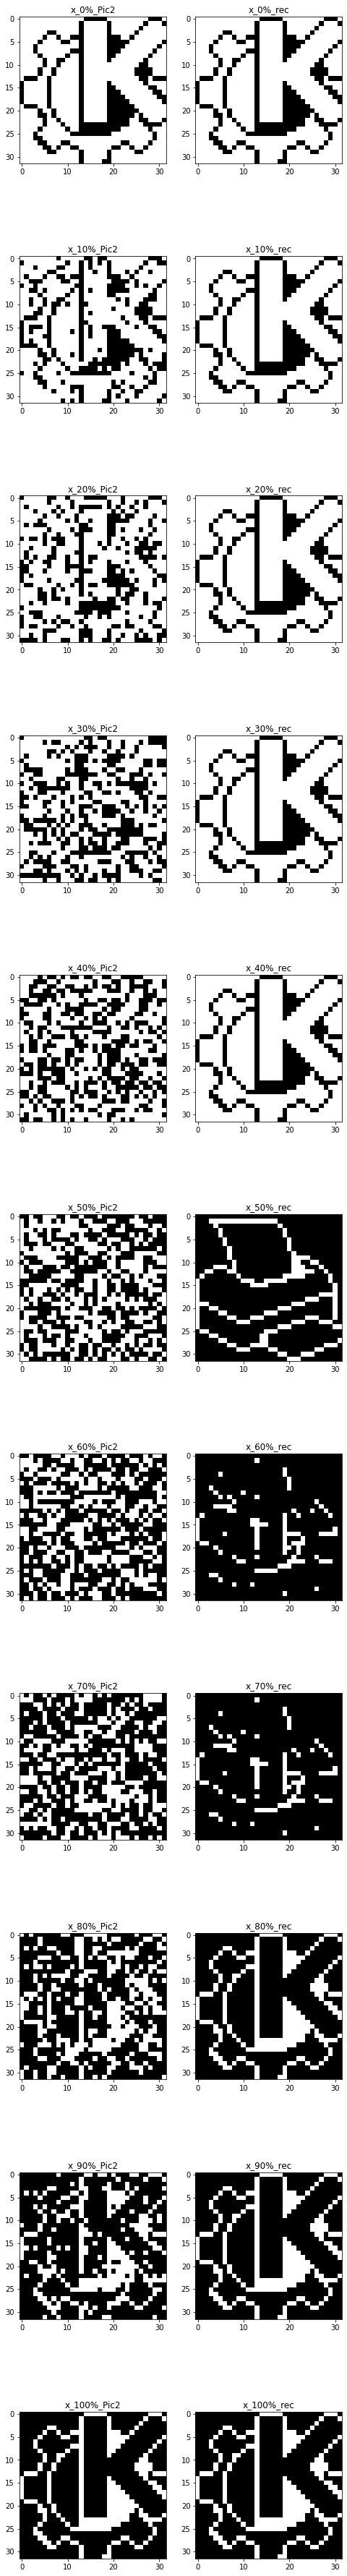

In [65]:
hopfield.compare_noisy_img_patterns(X2_rec, X2, recovered=True, name='Pic2')

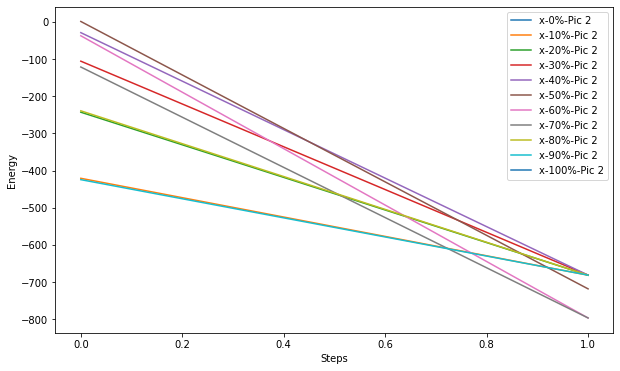

In [66]:
# Plot Energy Change Over Time
hopfield.plot_energies_noisy_img(energy_change_of_patterns_2,name='Pic 2')

#### Image 3 with Noise

In [67]:
# Image 3
X3 = noisy_picture3

# Train with Little Model
# Asynchronous (sequential) recall/update
steps = 100

# Shape of recovered distorted patterns
X3_rec = np.zeros(np.shape(X3))
n_patterns = np.shape(X3)[0]
n_patterns
energy_change_of_patterns_3 = []

for i in range(n_patterns):
    xs,energies,count = hopnet.synchronous_recall(X3[[i],:], steps)
    energy_change_of_patterns_3.append(energies)
    X3_rec[[i],:] = xs[-1]

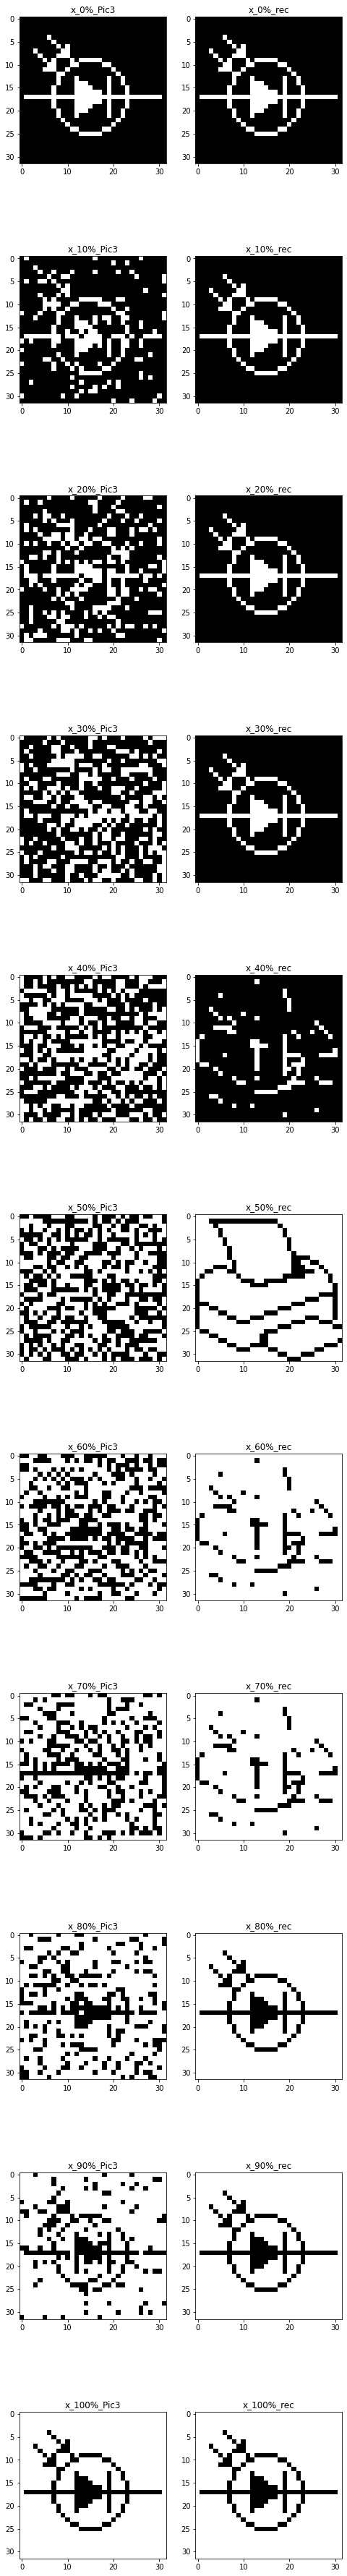

In [68]:
hopfield.compare_noisy_img_patterns(X3_rec, X3, recovered=True, name='Pic3')

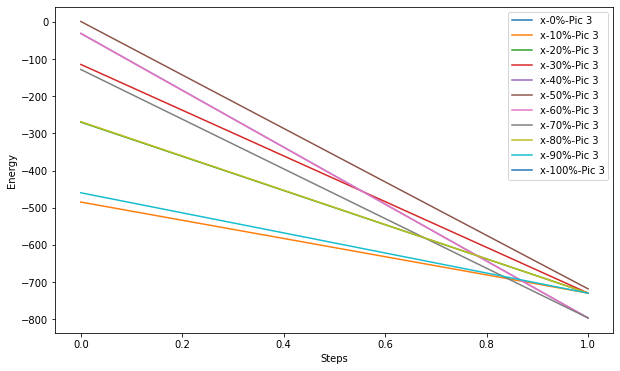

In [69]:
# Plot Energy Change Over Time
hopfield.plot_energies_noisy_img(energy_change_of_patterns_3,name='Pic 3')

## 3.5 Capacity

## 3.6 Sparse Patterns